Información de UCI

UCI dataset_repository es el repostorio de datos de la Universidad de California Irvine, con los datasets más populares para el aprendizaje automático. 

Enlace: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [1]:
## instalamos ucimlrepo
#!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 


{'uci_id': 544, 'name': 'Estimation of obesity levels based on eating habits and physical condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [3]:
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


<Axes: ylabel='Frequency'>

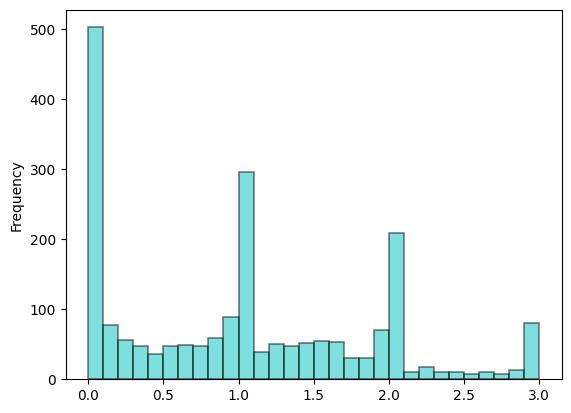

In [5]:
X['FAF'].plot(kind='hist', bins=30, color='c', edgecolor='black', linewidth=1.2, alpha=0.5, label='NCP')

<Axes: xlabel='NObeyesdad'>

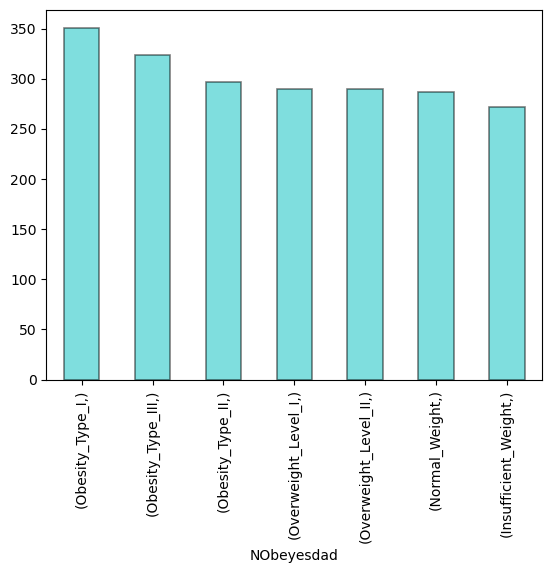

In [4]:
y.value_counts().plot(kind='bar', color='c', edgecolor='black', linewidth=1.2, alpha=0.5, label='NObeyesdad')

In [7]:
#### Hagamos una taba para estudiar las variables

import pandas as pd
import numpy as np

def describe_data(dataframe):
    columnas = dataframe.columns
    categorias = []
    faltantes=[]
    atipicos_iqr=[]
    unicos=[]
    minimo=[]
    q1=[]
    q2=[]
    q3=[]
    maximo=[]


    for col in columnas:
        categoria=dataframe[col].dtype
        categorias.append(categoria)
        faltante=dataframe[col].isna().sum()
        faltantes.append(faltante)
        unico=dataframe[col].nunique()
        unicos.append(unico)
        if categoria == 'int64' or categoria == 'float64':
            q75, q25 = np.percentile(dataframe[col], [75 ,25])
            iqr = q75 - q25
            atipico = dataframe[(dataframe[col] < (q25 - 1.5 * iqr)) | (dataframe[col] > (q75 + 1.5 * iqr))].shape[0]
            atipicos_iqr.append(atipico)
            minimo.append(dataframe[col].min())
            q1.append(dataframe[col].quantile(0.25))
            q2.append(dataframe[col].quantile(0.5))
            q3.append(dataframe[col].quantile(0.75))
            maximo.append(dataframe[col].max())
        else:
            atipicos_iqr.append('No aplica')
            minimo.append('No aplica')
            q1.append('No aplica')
            q2.append('No aplica')
            q3.append('No aplica')
            maximo.append('No aplica')

    resumen = pd.DataFrame({'Variable':columnas, 'Categoria':categorias, 'Faltantes':faltantes, 'Valores_unicos':unicos, 'Minimo':minimo, 'Q1':q1, 'Q2':q2, 'Q3':q3, 'Maximo':maximo, 'Atipicos_iqr':atipicos_iqr})
    return resumen
        
        



In [8]:
describe_data(X).to_excel('resumen.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

### Definición del tipo de variable

In [8]:
Numerica = ["Age", "Height", "Weight", "FCVC","NCP","CH2O","TUE"]
Dummy = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
Ordinal = ["CAEC", "FAF", "CALC"]
Nominal = ["MTRANS"]



### Pipeline Numérica

### Pipeline Dummy

### Pipeline Ordinal

### Pipeline Nominal